# Thinkful Capstone Project: "Etsy Epiphany"
### By Tiani Calip

# Problem Addressed

## Personal Interest and Problem
My mom owns an Etsy online store and is constantly stressing out about how well her products are doing, what price she should be listing her products at, and what product she should make and sell next. I want to create a solution for her to be able to identify what the most popular products are, how the reviews trend over time, and how the sentiment of review text maps against the review ratings. This way, she would be able to see how her products are doing compared to similar items on Etsy, and be able to respond to the demand for certain types of popular items and create and sell her own. Sometimes, she doesn’t understand why one shirt sells more than another. Providing review mapping and sentiment analysis will allow her and other users to identify what qualities of their products are favorable or not, be able to address those during production, and thereby possibly increase their chance of getting favorited.  

## Goal  
Using NLP and machine learning techniques, I will identify the top 20 important qualities (description, title, and tags) needed for any given Etsy user to use to improve their chance of getting favorited.  

## Hypothesis
By using machine learning and NLP, I can give suggesthions on product descriptions and help a store increase their favorites by 5%.

### Gameplan:   
Get the shop info for every shop that can be found with the keyword: "Disney"  
Use shop_ids to get the listing info   
Use the value of the feedback to train a classification model to know when a sentiment is positive or negative  
Identify the most important digrams/phrases in a shop's collective messages that lead to a positive sentiment  
Compare prices of the listings that have those positive sentiments  
Compare # of favorites to price of the listings with the positive sentiments  
Compare that with my mom's sentiments and prices and give suggestions for price and product qualities


fork out positive reviews and negative. see what ppl are saying abt both, give advice to the stores for what they could change abt their stores and improve.  
give suggestions abt what shop can do that others/competetors are doing  


## Impact  
I can determine the important qualities of a product that lead to the best reviews and review sentiments, then identify the most optimal price to increase the number of favorites. This can help my mom and any other prospective users to get ideas for their next products, and have confidence to list the products at an optimal price for both the seller and the buyer.  

# Dataset  
Data source = Etsy itself! I used the Etsy API to collect the data in real time from shops that have the keyword "Disney"

## Existing Efforts
No existing Etsy apps look at both review scores and sentiments in an effort to identofy important qualities. I'm excited to see if I can be the first!  

# Project Concerns


## Assumptions
I am making the assumption that the limits and offset that I chose for my API requests will give me a good representation of the Disney themed Etsy store population

## Risks (of data or models)
This is my first time using an API outside of the Thinkful course. I do not expect it to be an easy learning curve.  
Some data that would be ideal requires an OAuthentification, which means any user I want to scrape data from needs to verify and approve my data scraping. I do not want random users to feel threatened by my data grabbing, so I will have to go in a roundabout way to grab the data I want.  

## Questions Resulting
What is the best way to measure my scenario (binary outcome, probability outcome, or quantitative outcome)?


# Outcomes
__Top 10 vocabulary:__  
Descriptions: 'button', 'band', 'ornament', 'check', 'epcot', 'fits', 'Christmas', 'shirts', 'listings', 'image'  
Messages: 'magic', 'shipping', 'trip', 'christmas', 'ordered', 'shirts', 'family', 'disney', 'husband', 'pin'  
Tags: 'epcot', 'band', 'vinyl', 'magic', 'ornament', 'custom', 'silver', 'movie', 'cruise', 'tank'

__Bottom 10 vocabulary:__  
Descriptions: 'return', 'buy', 'item', 'cost', 'hang', 'pictures', 'mail', 'shirt', 'shipping', 'design  
Messages: None (Makes sense because no one would favorite an item they didn't like)  
Tags: 'stitch', 'new', 'fantasy', 'vacation', 'wars', 'star', 'girls', 'gold', 'vintage', 'book'  

It seems:   
- As time increases since creation, the number of favorites decrease  
- As the number of listings per shop increases, the number of favorites increases  
- As the price increases, the number of favorites slightly increases  
- As the rating value of the shop increases, the number of favorites slightly decreases  

According to our correlation matrix, the strongest correlation is 0.52, between the number of favorites and listing active count. 

## Future work:
Look at the number of sales of those listing, which requires shop owner access and authentication to grab that data.
Compare sales to price of the listings with the positive sentiments.  
See how changing the descriptions, titles, tags, and prices can increase favorites and sales.  

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set(style="whitegrid")

# import NLP packages
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# import
from sklearn import ensemble

In [2]:
# Open up the csv with the final data frame for this project
final_df = pd.read_csv('final_df.csv')

# Count Vectorizer

In [3]:
final_df

,user_id,shop_name,num_favorites,title,description,tags,price,message,value,listing_active_count,creation_yr
0,20413,DisneyObscura,355.0,Moana toddler baby with Stitch crossover mashu...,Baby Moana making friends with Stitch on the b...,"moana, baby moana, toddler moana, stitch, beac...",57.277778,"if i could give this 1,000 stars i would!! i l...",1.000000,18,2006
1,6112479,DisneyBottleCaps,1113.0,Disney Princess POCAHONTAS 3D Finished Bottle ...,♥ Finished Bottle Cap ♥Finished Bottle Caps fo...,"disney, disney princess, princess pocahontas, ...",7.759690,Perfect party favor for my daughter’s birthday...,0.992278,226,2015
2,7543374,DisneyGirl84,12.0,Princess Leia custom disney ears,These cute ears are inspired by Star Wars and ...,"gifts, disney, vacation, disneyland, star wars...",20.000000,Great buyer and easy to communicate with Grea...,1.000000,1,2011
3,8082338,disneyfarmhouse,0.0,Disney autograph signing board Disney autograp...,"Disneyland, Walt Disney World, or Disney cruis...",,15.000000,"I was expecting a canvas, and got a night piec...",1.000000,5,2018
4,11738325,DisneyDivas,26.0,Personalized superhero t shirt Personalized Ba...,Personalized super hero t shirt with super kid...,"super hero, marvel, spiderman, superman, batma...",14.400000,Came a little late but is excellent work.,1.000000,5,2013
5,18713976,NataliFashionDOLL,121.0,Clothing For Dolls DisneyAnimators Clothing Fo...,"Disney Animator, suitable for all dolls in thi...","clothes for dolls, dress, doll sandals, 50cm...",18.032258,Purchased two dresses and they are both AMAZIN...,1.000000,31,2018
6,19856189,DisneyBlueLine,153.0,Thank you for your service coin Thin Blue Line...,This is a Fantasy coin 2.5 inches cut I to a M...,,9.615385,My friend loved her birthday present. Thank yo...,1.000000,13,2016
7,20850951,MakingCruiseMemories,2652.0,"Disney Cruise Door Magnets Disney Shirt Man, I...",**NEW LARGER SIZE LITTLE HEADS**You will recei...,"disney cruise, disney magnet, cruise magnet, d...",14.485054,"My daughter loves this shirt, fast delivery! B...",0.987500,184,2013
8,20986912,disneyaddictedears,0.0,Marie! Deadpool! Animal print Frozen! Pink lad...,Cuz I'm a lady! Lovely pair of Marie ears! Per...,"marie marvel, deadpool animal print anna and e...",23.459459,I love my new ears!!! Going to Disney in Decem...,1.000000,37,2016
9,21726696,DesignedMemories46,288.0,Minnie Mouse Autograph & Scrapbook Minnie Mous...,Trying to capture those perfect Disney moments...,"disney photo album, signature books, disneylan...",34.375000,Beautiful album and amazing communication from...,1.000000,16,2015


In [4]:
# Creating the tf-idf matrix.
counter = TfidfVectorizer(lowercase=True,
                          stop_words='english',
                          ngram_range=(1, 1),  # Bigrams later maybe
                          analyzer=u'word',
                          max_df=.5,
                          min_df=10,
                          max_features=None,
                          vocabulary=None,
                          binary=False)

In [5]:
# TFIDF Vectorizer applied to all shops' messages
msg_list = final_df['message'].fillna('').values.tolist()
# Applying the vectorizer
msg_data_counts = counter.fit_transform(msg_list)
vocab_msg = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' descriptions
dsc_list = final_df['description'].fillna('').values.tolist()
# Clean just in case
dsc_list = [d.replace('\r', '').replace(
    '\n', '').replace('1&quot;', '') for d in dsc_list]
# Applying the vectorizer
dsc_data_counts = counter.fit_transform(dsc_list)
vocab_dsc = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' tags
tag_list = final_df['tags'].fillna('').values.tolist()
# Applying the vectorizer
tag_data_counts = counter.fit_transform(tag_list)
vocab_tag = counter.get_feature_names()

# grab all shops' avg prices
price_list = final_df['price'].values

# grab all shops' active num of listings
listing_count_list = final_df['listing_active_count'].values

# grab all shops' creation times (epoch seconds)
creation_yr_list = final_df['creation_yr'].values

# grab all shops' avg rating value
value_list = final_df['value'].values

In [6]:
# Manage shapes of lists
price_list.shape = (len(price_list), 1)
listing_count_list.shape = (len(listing_count_list), 1)
creation_yr_list.shape = (len(creation_yr_list), 1)
value_list.shape = (len(value_list), 1)

In [7]:
# Confirm the shapes all have the same num of rows and at least one column
print(msg_data_counts.shape)
print(dsc_data_counts.shape)
print(tag_data_counts.shape)
print(price_list.shape)
print(listing_count_list.shape)
print(creation_yr_list.shape)
print(value_list.shape)  

(127, 431)
(127, 686)
(127, 245)
(127, 1)
(127, 1)
(127, 1)
(127, 1)


In [8]:
# Concatenate all the lists together into a matrix
X_matrix = np.concatenate((msg_data_counts.toarray(), dsc_data_counts.toarray(
), tag_data_counts.toarray(), price_list, listing_count_list, creation_yr_list), axis=1)
# I found out that avg rating value actually inc error, so don't include in X_matrix
X_matrix.shape

(127, 1365)

In [9]:
# Set y
y = final_df['num_favorites'].values

Now, I will attempt various linear regressions to see which regression model best predicts the liklihood of a shop getting favorited.  
Methodology: do train test split, fit transform on X_matrix  
Models attempted: Lasso, Multivariate Linear Regression  
Make sure num favs prediction is less using all the words averaging than regressors

In [10]:
# Import packages for lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [11]:
# Run lasso regression on X_matrix
lasso = Lasso(alpha=.5)
err = []
err_dumb = []
for train, test in kf.split(X_matrix):
    print(" ")
    X_train = X_matrix[train]
    y_train = y[train]
    X_test = X_matrix[test]
    lasso.fit(X_train, y_train)
    y_test = y[test]
    y_pred = lasso.predict(X_test)
    err.append(np.mean(np.abs(y_pred - y_test)))
    y_pred_dumb = np.array([np.mean(y_train)]*len(y_test))
    err_dumb.append(np.mean(np.abs(y_pred_dumb - y_test)))
print(err)
print()
print(err_dumb)
print()
print('The avg errors for each regression model:')
print(np.mean(err))
print()
print(np.mean(err_dumb))

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[1016.8519683780166, 1523.6366802544928, 635.6894312777522, 651.5131433346902, 624.9586020239745]

[1027.6527037319115, 1810.616527037319, 758.92, 757.8019607843137, 730.6894117647058]

The avg errors for each regression model:
890.5299650537852

1017.13612066365


Great! It seems like the error for our lasso regression model is not as high as when we take the averages and predict that way  
It seems like many of our vocab words add noise and make the regression model less accurate. Next, I will identify the most influential words and examine the affects each word have on the liklihood of the shop being favorited, and then feature engineer my regressor accordingly.

In [12]:
# Play around with the alpha parameter and see if we can improve it
ridgeregr = linear_model.Ridge(alpha=0.35)
err = []
err_dumb = []
for train, test in kf.split(X_matrix):
    print(" ")
    X_train = X_matrix[train]
    y_train = y[train]
    X_test = X_matrix[test]
    ridgeregr.fit(X_train, y_train)
    y_test = y[test]
    y_pred = ridgeregr.predict(X_test)
    err.append(np.mean(np.abs(y_pred - y_test)))
    y_pred_dumb = np.array([np.mean(y_train)]*len(y_test))
    err_dumb.append(np.mean(np.abs(y_pred_dumb - y_test)))
    
# Examine the error
print(err)
print()
print(err_dumb)
print()
print(np.mean(err))
print()
print(np.mean(err_dumb))

 
 
 
 
 
[964.8285865898943, 1476.1563748740077, 640.3198176690727, 559.9259056157036, 438.14688261536185]

[1027.6527037319115, 1810.616527037319, 758.92, 757.8019607843137, 730.6894117647058]

815.8755134728079

1017.13612066365


In [13]:
# Calc coef
print("Lasso coefficient avg:")
print(np.mean(lasso.coef_[0:-3] != 0))
print("Ridge coefficient avg:")
print(np.mean(ridgeregr.coef_[0:-3] != 0))

Lasso coefficient avg:
0.0697503671071953
Ridge coefficient avg:
1.0


It seems like the __Ridge Regression__ model gives better results because the error is less than the error from the lasso regression.  
Moving forward we will use the Ridge Regression model for our visualizations and calculations.  

In [14]:
coef_copy = np.copy(np.abs(ridgeregr.coef_[0:-3]))
coef_copy.sort()
coef_copy

array([1.59436439e-01, 2.71158690e-01, 3.37399928e-01, ...,
       1.32078604e+03, 1.37117819e+03, 1.73505114e+03])

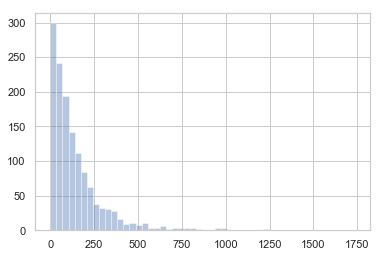

In [15]:
bx = sns.distplot(coef_copy, kde=False, rug=False)

Data is understandably not normal, We have a nice drop off as values increase. 

In [16]:
# Create a vocab list and calc coef
np.mean(ridgeregr.coef_[0:-3] > 0)  # price is out
vocab = vocab_msg + vocab_dsc + vocab_tag
feature_type = ['message'] * len(vocab_msg) + ['description'] * \
    len(vocab_dsc) + ['tag'] * len(vocab_tag)
temp_df = pd.DataFrame({'vocab': vocab, 'coef': ridgeregr.coef_[
                       0:-3], 'feature_type': feature_type})

In [17]:
# These are the words that have an influence on whether ppl fav the shop or not
influential_words = temp_df[temp_df['coef'] != 0]

In [18]:
# Group by the vocab's feature type
temp_df.groupby('feature_type').agg('count')

,coef,vocab
feature_type,,
description,686,686
message,431,431
tag,245,245


According to this table, the majority of the words that are influential on whether an item is favorited are description features. The next influential one is tags, and lastly message. This shows that since shop owners set their own descriptions and tags, when done right, they can have a big impact on encouraging the number of favorites they get.

This is good news for shop owners like my mom, and encourages all shop owners to take their descriptions and tags seriously.

In [19]:
# Sort the influential words
influential_words = pd.DataFrame(influential_words.drop_duplicates().groupby(
    ['vocab', 'feature_type'])['coef'].mean().sort_values(ascending=False)).reset_index()
influential_words

,vocab,feature_type,coef
0,button,description,1735.051141
1,band,description,1371.178188
2,ornament,description,1320.786041
3,magic,message,1220.278301
4,shipping,message,1219.039421
5,check,description,1208.775373
6,trip,message,1117.893624
7,epcot,tag,998.885543
8,epcot,description,992.184148
9,christmas,message,978.341305


In [20]:
# Identify the top 20 descriptions, tags, and messages positively associated with being favorited

beneficial_desc = influential_words[influential_words['feature_type']== 'description'].head(10)
beneficial_tag = influential_words.loc[influential_words['feature_type'] == 'tag'].head(10)
beneficial_msg = influential_words.loc[influential_words['feature_type'] == 'message'].head(10)

# Identify the top 20 words negatively
harmful_desc = influential_words.loc[influential_words['feature_type']
                                        == 'description'].tail(10)
harmful_tag = influential_words.loc[influential_words['feature_type']
                                        == 'tag'].tail(10)
harmful_msg = influential_words.loc[influential_words['feature_type']
                                        == 'messsage'].tail(10)

In [21]:
beneficial_desc

,vocab,feature_type,coef
0,button,description,1735.051141
1,band,description,1371.178188
2,ornament,description,1320.786041
5,check,description,1208.775373
8,epcot,description,992.184148
12,fits,description,964.628296
14,christmas,description,867.283183
16,shirts,description,794.336745
18,listings,description,759.591833
20,image,description,722.029639


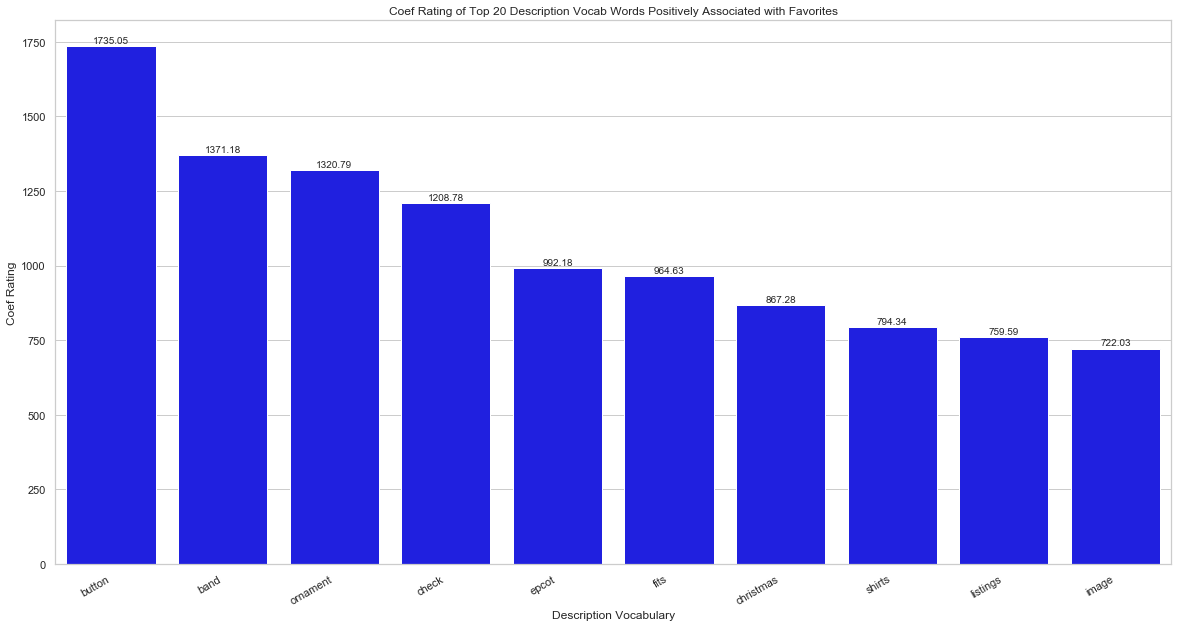

In [22]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=beneficial_desc, x='vocab',
                 y='coef', color='blue', saturation=0.75)
ax.set(title='Coef Rating of Top 20 Description Vocab Words Positively Associated with Favorites',
       xlabel='Description Vocabulary', ylabel='Coef Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# Show plot
show_values_on_bars(ax)
plt.show()

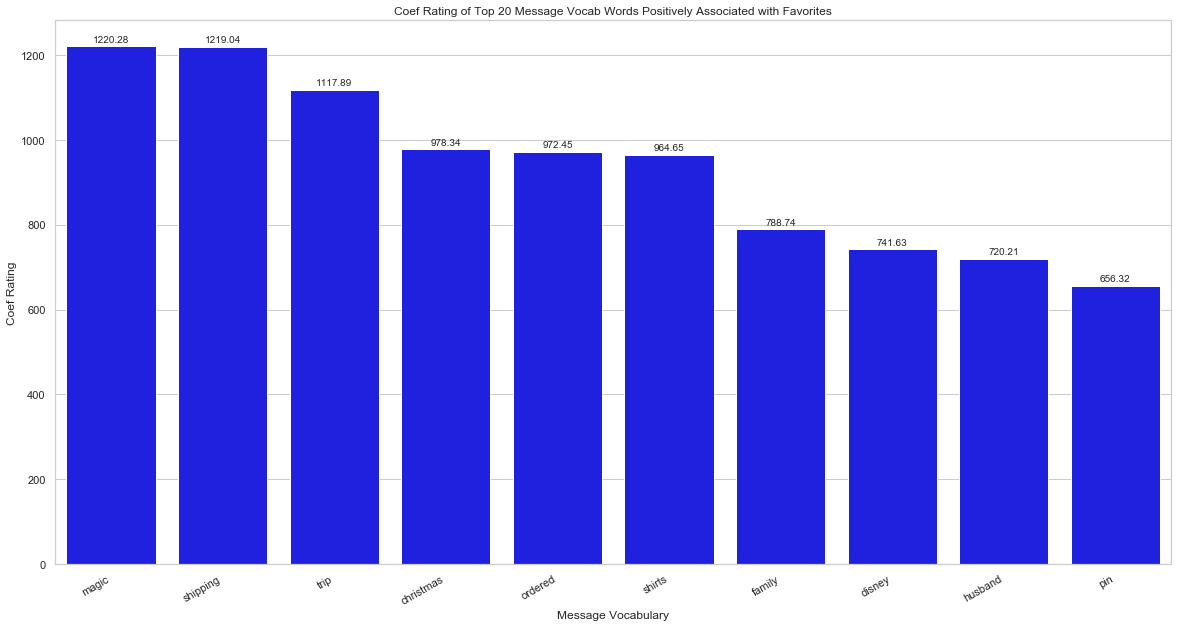

In [23]:
# Set up the matplotlib figure.
f, a1x = plt.subplots(figsize=(20, 10))
a1x = sns.barplot(data=beneficial_msg, x='vocab',
                 y='coef', color='blue', saturation=0.75)
a1x.set(title='Coef Rating of Top 20 Message Vocab Words Positively Associated with Favorites',
       xlabel='Message Vocabulary', ylabel='Coef Rating')
a1x.set_xticklabels(a1x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(a1xs):
    def _show_on_single_plot(a1x):
        for p in a1x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            a1x.text(_x, _y, value, ha="center")

    if isinstance(a1xs, np.ndarray):
        for idx, ax in np.ndenumerate(a1xs):
            _show_on_single_plot(a1x)
    else:
        _show_on_single_plot(a1xs)


# Show plot
show_values_on_bars(a1x)
plt.show()

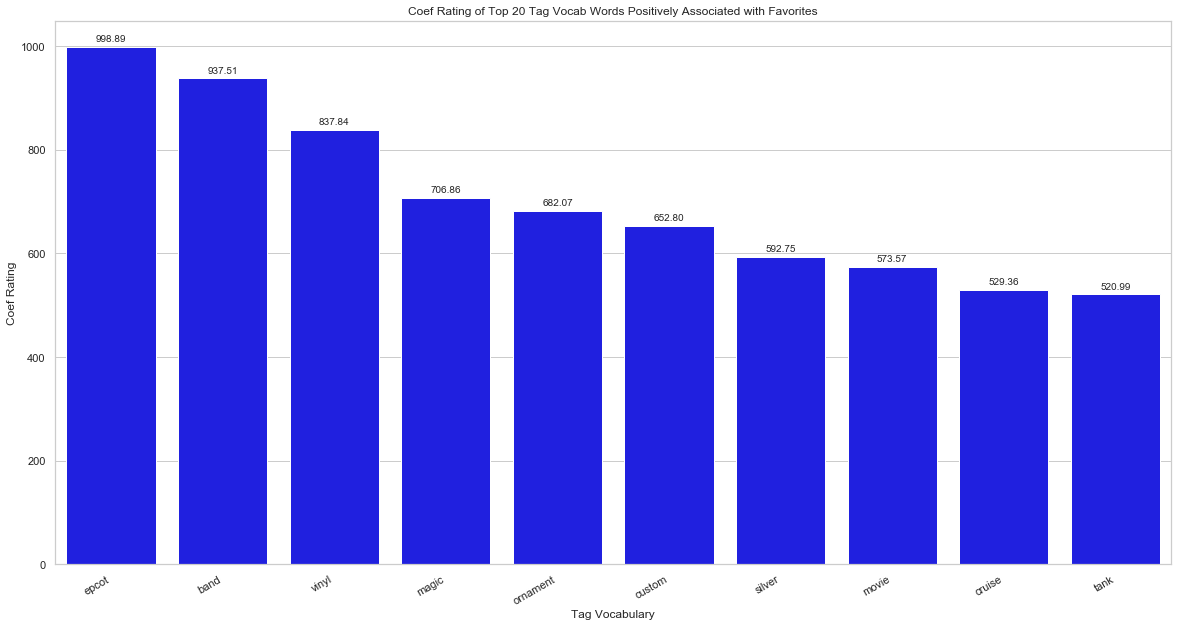

In [24]:
# Set up the matplotlib figure.
f, a2x = plt.subplots(figsize=(20, 10))
a2x = sns.barplot(data=beneficial_tag, x='vocab',
                 y='coef', color='blue', saturation=0.75)
a2x.set(title='Coef Rating of Top 20 Tag Vocab Words Positively Associated with Favorites',
       xlabel='Tag Vocabulary', ylabel='Coef Rating')
a2x.set_xticklabels(a2x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(a2xs):
    def _show_on_single_plot(a2x):
        for p in a2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 10
            value = '{:.2f}'.format(p.get_height())
            a2x.text(_x, _y, value, ha="center")

    if isinstance(a2xs, np.ndarray):
        for idx, ax in np.ndenumerate(a2xs):
            _show_on_single_plot(a2x)
    else:
        _show_on_single_plot(a2xs)


# Show plot
show_values_on_bars(a2x)
plt.show()

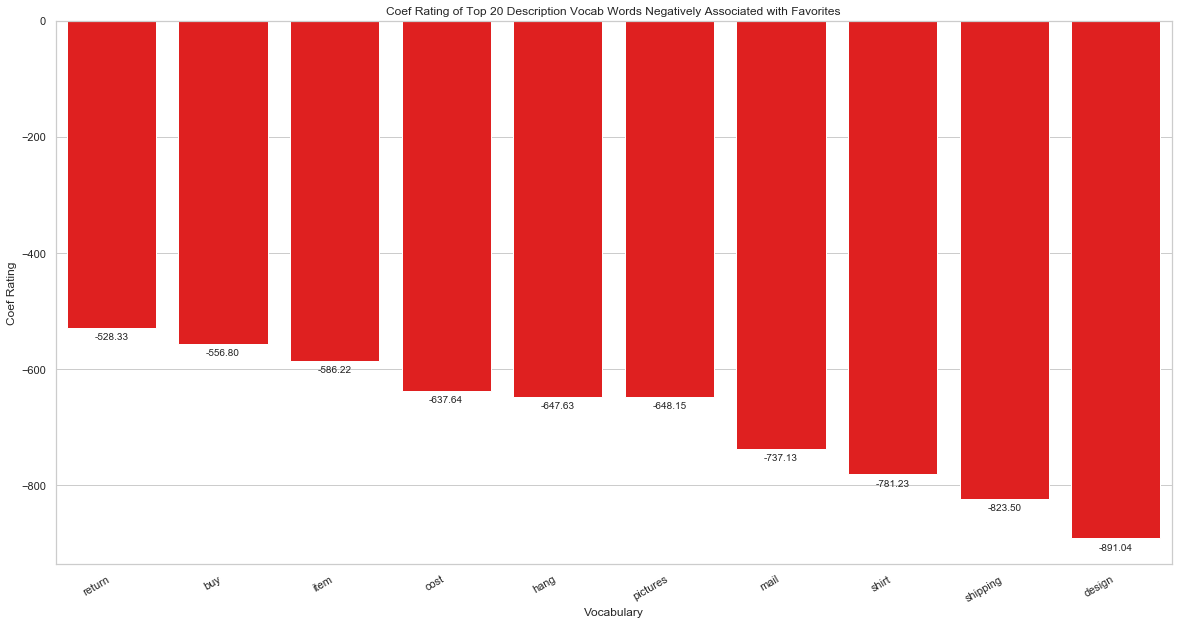

In [25]:
# Set up the matplotlib figure.
f, bx = plt.subplots(figsize=(20, 10))
bx = sns.barplot(data=harmful_desc, x='vocab',
                 y='coef', color='red', saturation=0.75)
bx.set(title='Coef Rating of Top 20 Description Vocab Words Negatively Associated with Favorites',
       xlabel='Vocabulary', ylabel='Coef Rating')
bx.set_xticklabels(bx.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(bxs):
    def _show_on_single_plot(bx):
        for p in bx.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            bx.text(_x, _y, value, ha="center")

    if isinstance(bxs, np.ndarray):
        for idx, bx in np.ndenumerate(bxs):
            _show_on_single_plot(bx)
    else:
        _show_on_single_plot(bxs)


# Show plot
show_values_on_bars(bx)
plt.show()

In [26]:
harmful_msg

,vocab,feature_type,coef


ValueError: min() arg is an empty sequence

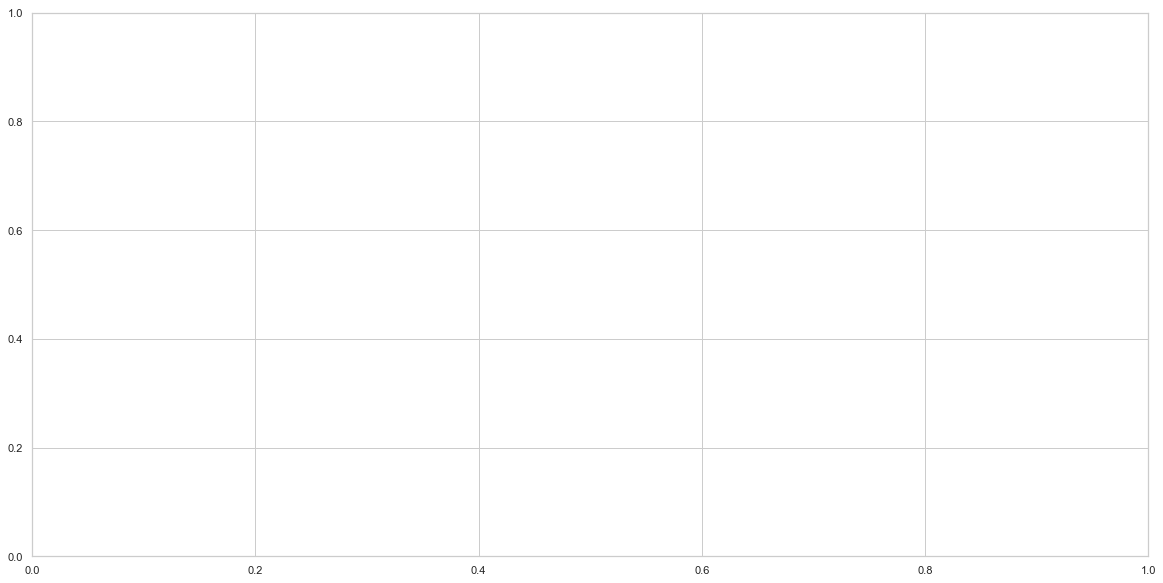

In [27]:
# Set up the matplotlib figure.
f, b1x = plt.subplots(figsize=(20, 10))
b1x = sns.barplot(data=harmful_msg, x='vocab',
                 y='coef', color='red', saturation=0.75)
b1x.set(title='Coef Rating of Top 20 Message Vocab Words Negatively Associated with Favorites',
       xlabel='Message Vocabulary', ylabel='Coef Rating')
b1x.set_xticklabels(b1x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(b1xs):
    def _show_on_single_plot(b1x):
        for p in b1x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            b1x.text(_x, _y, value, ha="center")

    if isinstance(b1xs, np.ndarray):
        for idx, bx in np.ndenumerate(b1xs):
            _show_on_single_plot(b1x)
    else:
        _show_on_single_plot(b1xs)


# Show plot
show_values_on_bars(b1x)
plt.show()

In [ ]:
# Set up the matplotlib figure.
f, b2x = plt.subplots(figsize=(20, 10))
b2x = sns.barplot(data=harmful_tag, x='vocab',
                 y='coef', color='red', saturation=0.75)
b2x.set(title='Coef Rating of Top 20 Tag Vocab Words Negatively Associated with Favorites',
       xlabel='Tag Vocabulary', ylabel='Coef Rating')
b2x.set_xticklabels(b2x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(b2xs):
    def _show_on_single_plot(b2x):
        for p in b2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 20
            value = '{:.2f}'.format(p.get_height())
            b2x.text(_x, _y, value, ha="center")

    if isinstance(b2xs, np.ndarray):
        for idx, bx in np.ndenumerate(b2xs):
            _show_on_single_plot(b2x)
    else:
        _show_on_single_plot(b2xs)


# Show plot
show_values_on_bars(b2x)
plt.show()

# Where I try at the listing level

In [ ]:
# Open the listing level files
df_listing_final = pd.read_csv('df_listing_final.csv')
df_listing_final = df_listing_final.drop(['Unnamed: 0'], axis=1)
df_listing_final['style'] = df_listing_final['style'].fillna('')
df_listing_final.shape

In [6]:
# Visualize
df_listing_final

,listing_id,num_favorites,user_id,title,description,tags,style,is_digital,is_customizable,price,creation_yr
0,262981963,100,38103717,Up inspired our love is sn adventure 3 button,Our LE Up inspired our love is an adventure 3 ...,"['balloons', 'Ellie', 'Carl', 'up', 'disney mo...",,0,0,5.00,2018
1,591514611,100,103655661,Flower and garden Mickey Mouse ears| flower an...,"Gorgeous rose gold ears with peach, pink and ...","['Mickey ears', 'Mickey Mouse ears', 'Minnie ...",,0,1,35.00,2018
2,528942794,100,30837077,Dcl FE gift (2) LED Lanterns great party favor...,You get 2Stand about 4 inches tall very cute d...,"['Disney shower', 'hidden Mickey', 'DISNEYCRUI...",,0,1,20.00,2018
3,549566703,100,44053694,Black and White Disney Family Shirts - Disney ...,Halloween Special !! ***********************PL...,"['disney family shirts', 'halloween disney', '...",,0,0,14.00,2018
4,275137002,100,42828296,Color Changing Monorail Shirt in Gray - Limite...,LIMITED QUANTITIES AVAILABLE! This vintage st...,"['Disney World Shirt', 'Magic Kingdom', 'Walt ...",,0,0,20.00,2018
5,226595114,100,33819301,Stormtrooper Magic Band Vinyl Decal,This is a Stormtrooper vinyl decal to apply to...,"['Stormtrooper', 'star wars', 'magic band', 'v...",,0,0,3.00,2018
6,223503090,100,42828296,EPCOT Shirt - EPCOT Center T-Shirt with Pavili...,"This retro EPCOT shirt reads: Entertain, Infor...","['vintage retro shirt', 'walt disney world', '...",,0,0,25.00,2018
7,584325853,100,43098919,Halloween Earrings,These Disney handmade earrings are PERFECT for...,"['Halloween earrings', 'ghost earrings', 'pump...",,0,0,8.00,2018
8,589646449,100,44053694,Disney Ladies Tank Tops - Disney Rose Gold 201...,Tank tops for the ladies to match their EARS!!...,"['Disney family shirts', 'disney tank tops', '...",,0,0,14.00,2018
9,584104597,100,103655661,Little mermaid Mickey ears | little mermaid ea...,Super cute founder inspired Mickey ears 🐟💛Head...,"['Mickey ears', 'Minnie ears', 'Minnie Mouse e...",,0,1,35.00,2018


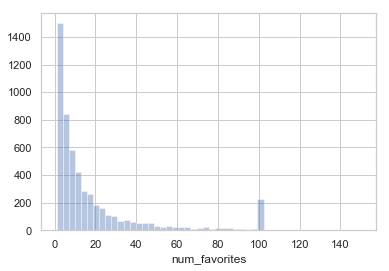

In [7]:
ax = sns.distplot(df_listing_final['num_favorites'], kde=False, rug=False)

There is a gradual drop off in the number of favorites as it increases; however, we have a short burst of increase at 100, which is the max amount of listing favorites I accounted for per listing.

In [8]:
df_listing_final.num_favorites.var()

609.9551225192273

In [9]:
# TFIDF Vectorizer applied to all shops' titles
title_list = df_listing_final['title'].fillna('').values.tolist()
# Applying the vectorizer
title_data_counts = counter.fit_transform(title_list)
feature_title = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' descriptions
dsc_list = df_listing_final['description'].fillna('').values.tolist()
# Clean just in case
dsc_list = [d.replace('\r', '').replace(
    '\n', '').replace('1&quot;', '') for d in dsc_list]
# Applying the vectorizer
dsc_data_counts = counter.fit_transform(dsc_list)
feature_dsc = counter.get_feature_names()

# TFIDF Vectorizer applied to all shops' tags
tag_list = df_listing_final['tags'].fillna('').values.tolist()
# Applying the vectorizer
tag_data_counts = counter.fit_transform(tag_list)
feature_tag = counter.get_feature_names()

# Add listing prices
price_list = df_listing_final['price'].values

# Add listing digital info
dig_list = df_listing_final['is_digital'].values

# Add listing customizable info
custom_list = df_listing_final['is_customizable'].values

In [10]:
# Verify all the lists have the same amount of rows and that there is at least one column
print(title_data_counts.shape)
print(dsc_data_counts.shape)
print(tag_data_counts.shape)
price_list.shape = (len(price_list), 1)
print(price_list.shape)
dig_list.shape = (len(dig_list), 1)
print(dig_list.shape)
custom_list.shape = (len(custom_list), 1)
print(custom_list.shape)

(5345, 672)
(5345, 2169)
(5345, 742)
(5345, 1)
(5345, 1)
(5345, 1)


In [11]:
# Set X Matrix equal to all the things we just put through the vectorizer, plus the price info
X_listing_matrix = np.concatenate((title_data_counts.toarray(), dsc_data_counts.toarray(
), tag_data_counts.toarray(), price_list, dig_list, custom_list), axis=1)
X_listing_matrix.shape

(5345, 3586)

In [12]:
# Set the y value
y_listing = df_listing_final['num_favorites'].values

In [13]:
# Run a lasso regression on the listing level data
lasso2 = Lasso(alpha=.35)
listing_err = []
listing_err_dumb = []
for train, test in kf.split(X_listing_matrix):
    print(" ")
    X_train = X_listing_matrix[train]
    y_train = y_listing[train]
    X_test = X_listing_matrix[test]
    lasso2.fit(X_train, y_train)
    y_test = y_listing[test]
    y_pred = lasso2.predict(X_test)
    listing_err.append(np.mean(np.abs(y_pred - y_test)))
    y_pred_dumb = np.array([np.mean(y_train)]*len(y_test))
    print(y_pred_dumb)
    print(y_test)
    listing_err_dumb.append(np.mean(np.abs(y_pred_dumb - y_test)))

 
[11.55706268 11.55706268 11.55706268 ... 11.55706268 11.55706268
 11.55706268]
[100 100 100 ...  13  13  13]
 
[20.95182413 20.95182413 20.95182413 ... 20.95182413 20.95182413
 20.95182413]
[13 13 13 ...  2  2  2]
 
[20.27666043 20.27666043 20.27666043 ... 20.27666043 20.27666043
 20.27666043]
[  2   2   2 ... 106 104 104]
 
[15.5313377 15.5313377 15.5313377 ... 15.5313377 15.5313377 15.5313377]
[102 100 100 ...   8   8   8]
 
[21.50444341 21.50444341 21.50444341 ... 21.50444341 21.50444341
 21.50444341]
[ 8  8  8 ...  1  1 16]


In [14]:
# Calculate the error
print(listing_err)
print()
print(listing_err_dumb)
print()
print(np.mean(listing_err))
print()
print(np.mean(listing_err_dumb))

[32.054675705808634, 15.702396349978176, 18.489034255603094, 15.944365500502355, 18.370591268864306]

[32.03601496725913, 14.937792329279702, 18.583914528059672, 15.570345855345082, 17.700888681010294]

20.11221261615131

19.765791272190775


In [15]:
# Run a lasso regression on the listing level data
ridgeregr_list = linear_model.Ridge(alpha=0.35)
listing_err = []
listing_err_dumb = []
for train, test in kf.split(X_listing_matrix):
    print(" ")
    X_train_list = X_listing_matrix[train]
    y_train_list = y_listing[train]
    X_test_list = X_listing_matrix[test]
    ridgeregr_list.fit(X_train_list, y_train_list)
    y_test_list = y_listing[test]
    y_pred_list = ridgeregr_list.predict(X_test_list)
    listing_err.append(np.mean(np.abs(y_pred_list - y_test_list)))
    y_pred_dumb_list = np.array([np.mean(y_train_list)]*len(y_test_list))
    print(y_pred_dumb_list)
    print(y_test_list)
    listing_err_dumb.append(np.mean(np.abs(y_pred_dumb_list - y_test_list)))

 
[11.55706268 11.55706268 11.55706268 ... 11.55706268 11.55706268
 11.55706268]
[100 100 100 ...  13  13  13]
 
[20.95182413 20.95182413 20.95182413 ... 20.95182413 20.95182413
 20.95182413]
[13 13 13 ...  2  2  2]
 
[20.27666043 20.27666043 20.27666043 ... 20.27666043 20.27666043
 20.27666043]
[  2   2   2 ... 106 104 104]
 
[15.5313377 15.5313377 15.5313377 ... 15.5313377 15.5313377 15.5313377]
[102 100 100 ...   8   8   8]
 
[21.50444341 21.50444341 21.50444341 ... 21.50444341 21.50444341
 21.50444341]
[ 8  8  8 ...  1  1 16]


In [16]:
# Calculate the error
print(listing_err)
print()
print(listing_err_dumb)
print()
print(np.mean(listing_err))
print()
print(np.mean(listing_err_dumb))

[35.77114612166219, 15.622381020682795, 14.864780954582963, 21.626396429147842, 17.743942022121196]

[32.03601496725913, 14.937792329279702, 18.583914528059672, 15.570345855345082, 17.700888681010294]

21.1257293096394

19.765791272190775


In [17]:
# Create a vocab list and calc coef
np.mean(lasso2.coef_[0:-3] > 0)  # price, digital, customizable is out
feature_type2 =['description'] * len(feature_dsc) + ['title'] * len(feature_title) +  ['tag'] * len(feature_tag)
vocab2 = feature_dsc + feature_title + feature_tag
temp_df2 = pd.DataFrame({'vocab': vocab2, 'coef': lasso2.coef_[0:-3], 'feature_type': feature_type2})
# These are the words that have an influence on whether ppl fav the shop or not
influential_words2 = temp_df2[temp_df2['coef'] != 0]
influential_words2

,coef,feature_type,vocab
106,10.744805,description,accents
903,4.625110,description,given
1253,4.268005,description,mike
2417,-6.803715,title,fair


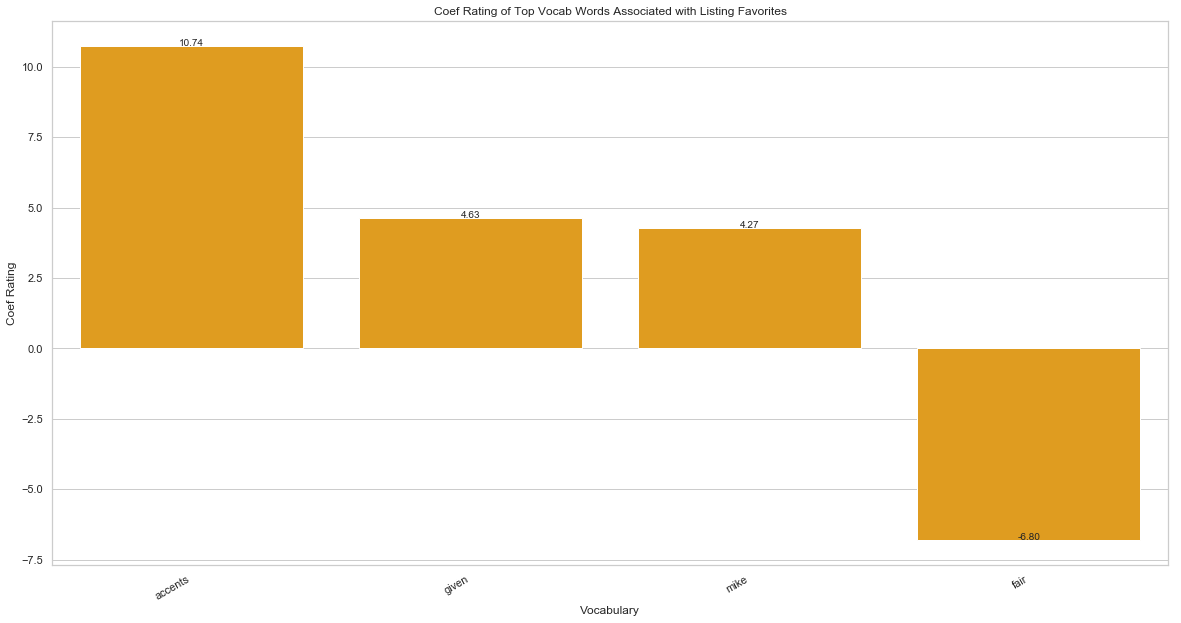

In [23]:
# Set up the matplotlib figure.
f, cx = plt.subplots(figsize=(20, 10))
cx = sns.barplot(data=influential_words2, x='vocab', y='coef', color='orange', saturation=0.75)
cx.set(title='Coef Rating of Top Vocab Words Associated with Listing Favorites', xlabel='Vocabulary', ylabel='Coef Rating')
cx.set_xticklabels(cx.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(cxs):
    def _show_on_single_plot(cx):
        for p in cx.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            cx.text(_x, _y, value, ha="center")

    if isinstance(cxs, np.ndarray):
        for idx, bx in np.ndenumerate(cxs):
            _show_on_single_plot(cx)
    else:
        _show_on_single_plot(cxs)


# Show plot
show_values_on_bars(cx)
plt.show()

Increasing the alpha parameter barely helps the accuracy of the model, and greatly decreases the number of words that are considered influential. This means that many of the words are made to have coefficients of zero.   

# Predictions

I plan to define a set of words in a for loop to predict how many favorites a shop is likely to get for different prices, tags or descriptions.

It would be interesting to take an existing shop's listing title, description and tags, spiff it up accodring to the influential vocab identified by the ridge regression model, and see how the number of favorites changes accordingly.  

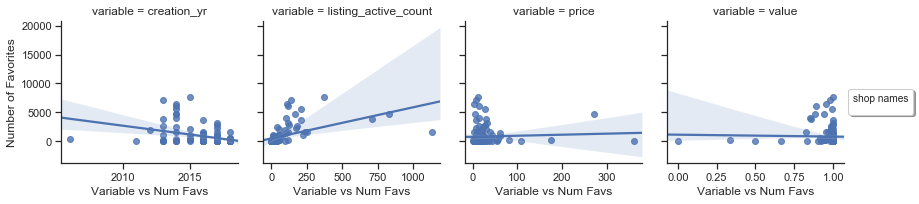

In [56]:
# Melt the data to visualize num fav compared to other variables
final_df_melt = pd.melt(final_df.drop(
    ['user_id', 'title', 'description', 'tags', 'message'], axis=1), id_vars=['shop_name', 'num_favorites'])
df_melt_grouped = final_df_melt.groupby(['variable', 'value', 'shop_name'])[
    'num_favorites'].mean().reset_index()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  # Setting the overall aesthetic
cx = sns.FacetGrid(df_melt_grouped, col="variable",
                   col_wrap=4, sharex=False)
cx = cx.map(sns.regplot, "value", 'num_favorites')
cx.set_ylabels("Number of Favorites")
cx.set_xlabels("Variable vs Num Favs")
plt.show()

It seems:   
as time increases since creation, the number of favorites decrease  
as the number of listings per shop increases, the number of favorites increases  
as the price increases, the number of favorites slightly increases  
as the rating value of the shop increases, the number of favorites slightly decreases

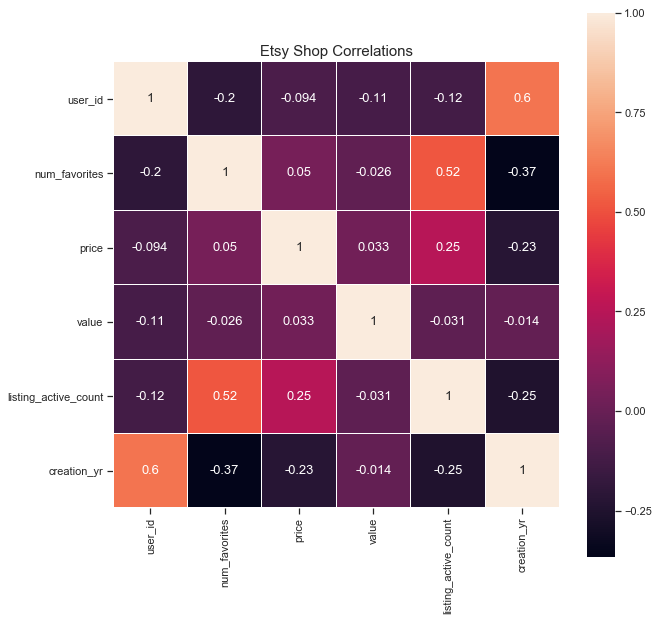

In [57]:
# Make the correlation matrix.
corrmat = final_df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn.
fig = sns.heatmap(corrmat, linewidths=0.1, vmax=1.0,
                  square=True, linecolor='white', annot=True, annot_kws={"size": 13})
plt.title('Etsy Shop Correlations', size=15)
# figure = fig.get_figure()
# figure.savefig('output.png')

plt.show()

It seems like the strongest correlation is between the number of favorites and listing active count at 0.52.

In [ ]:
# Choose a random listing
df_listing_final.loc[200:200, :]

In [ ]:
# Select listing
listing = X_listing_matrix[200:201, :]
# Set different prices to try
prices = [5, 10, 13.5, 50, 150, 500]

# Create tiles for listing info and predict favorites
Listing = np.tile(listing, (len(prices), 1))
Listing[:, -3] = prices
predicted_favs = gridgeregr_list.predict(Listing)

In [ ]:
# Set up the matplotlib figure.
f, px = plt.subplots(figsize=(20, 10))
px = sns.barplot(x=prices, y=predicted_favs, color='purple', saturation=0.75)
px.set(title='Price by Listing Favorites', xlabel='Price', ylabel='Number of Favorites')
px.set_xticklabels(px.get_xticklabels(), rotation=30, ha='right')

This array shows us that as the price increases, the number of favorites slightly decreases. The shallowness of how the number of favorites changes shows how the number of favorites is not greatly affected by the price.  
This is perhaps because you can favorite an item on Etsy even if you do not buy it! So, price is not necessarily a deterrence. 

Let's check out the shop level now. If I play around with the information such as average shop item price, number of active listings per shop, or creation year, how does it change?

In [49]:
final_df.loc[0:0, :]

,user_id,shop_name,num_favorites,title,description,tags,price,message,value,listing_active_count,creation_yr
0,20413,DisneyObscura,355.0,Moana toddler baby with Stitch crossover mashu...,Baby Moana making friends with Stitch on the b...,"moana, baby moana, toddler moana, stitch, beac...",57.277778,"if i could give this 1,000 stars i would!! i l...",1.0,18,2006


In [50]:
# In X_matrix, -3 is price, -2 is number of active listings per shop, -1 is creation yr
ridgeregr.predict(X_matrix[0:1, :])

array([840.39758628])

In [51]:
# Select 
shop = X_matrix[0:1, :]
# Set different prices to try
avg_prices = [5, 10, 13.5, 20, 35, 50, 57, 70]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(avg_prices), 1))
Shop[:, -3] = avg_prices
pred_favs = ridgeregr.predict(Shop)

NameError: name 'avg_prices' is not defined

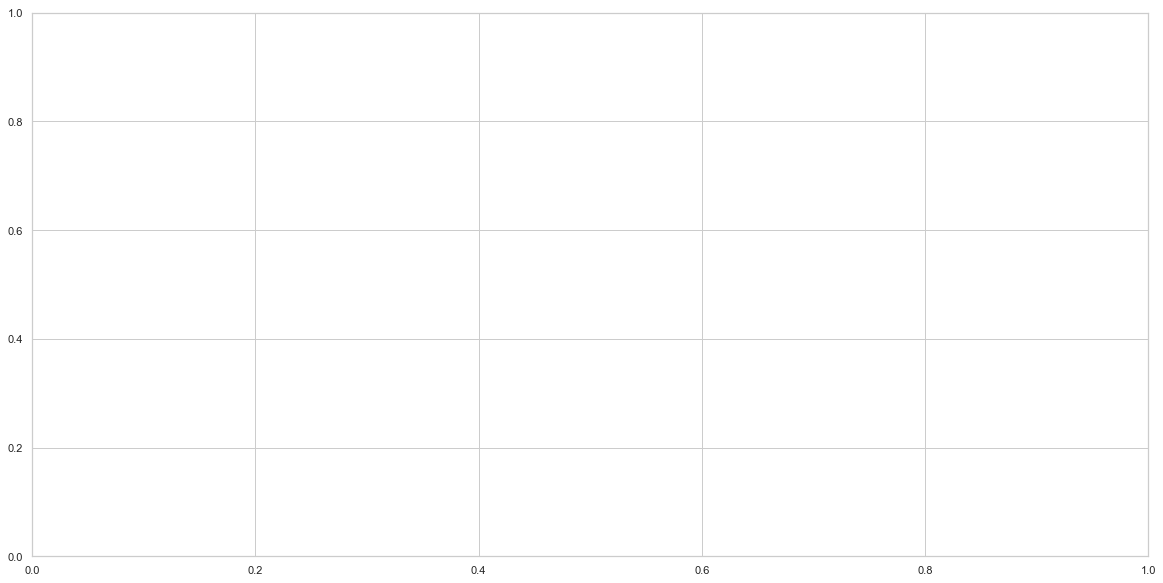

In [19]:
# Set up the matplotlib figure.
f, p2x = plt.subplots(figsize=(20, 10))
p2x = sns.barplot(x=avg_prices, y=pred_favs, color='purple', saturation=0.75)
p2x.set(title='Price by Listing Favorites', xlabel='Price', ylabel='Number of Favorites')
p2x.set_xticklabels(p2x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(p2xs):
    def _show_on_single_plot(p2x):
        for p in b2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            p2x.text(_x, _y, value, ha="center")

    if isinstance(p2xs, np.ndarray):
        for idx, bx in np.ndenumerate(p2xs):
            _show_on_single_plot(p2x)
    else:
        _show_on_single_plot(p2xs)


# Show plot
show_values_on_bars(p2x)
plt.show()

In [53]:
# If the numer of active listings is in num_lists, what does my lasso predict for the number of favs the shop will get?
# Select 
shop = X_matrix[0:1, :]
# Set different prices to try
num_lists = [5, 13, 18, 20, 50]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(num_lists), 1))
Shop[:, -2] = num_lists
pred_favs2 = ridgeregr.predict(Shop)

NameError: name 'num_lists' is not defined

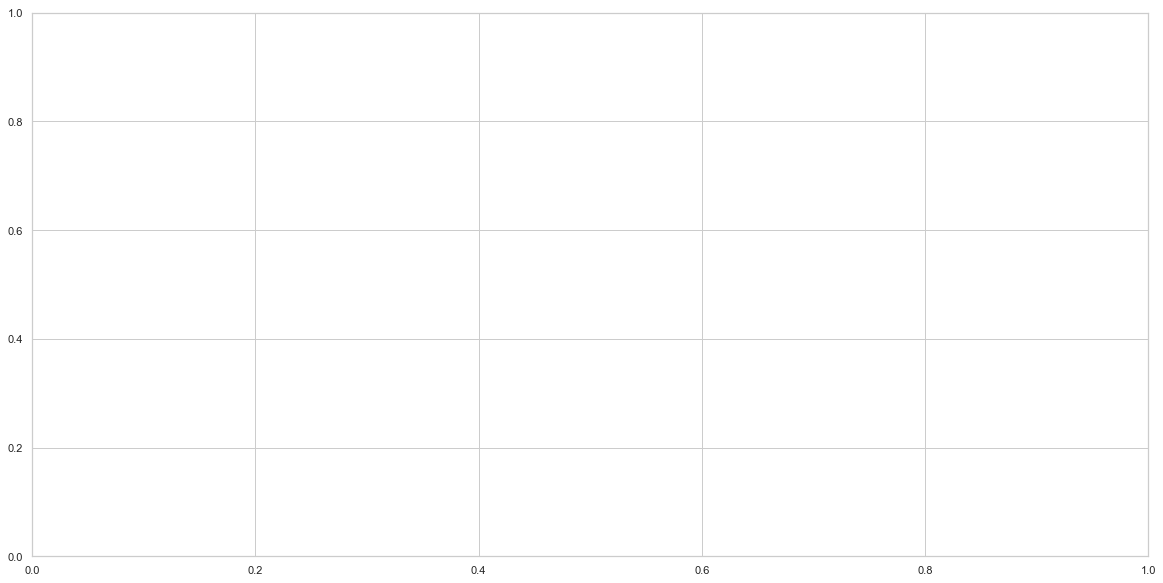

In [20]:
# Set up the matplotlib figure.
f, l2x = plt.subplots(figsize=(20, 10))
l2x = sns.barplot(x=num_lists, y=pred_favs2, color='purple', saturation=0.75)
l2x.set(title='Number of Active Listings by Listing Favorites', xlabel='Number of Active Listings', ylabel='Number of Favorites')
l2x.set_xticklabels(l2x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(l2xs):
    def _show_on_single_plot(l2x):
        for p in l2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            l2x.text(_x, _y, value, ha="center")

    if isinstance(l2xs, np.ndarray):
        for idx, bx in np.ndenumerate(l2xs):
            _show_on_single_plot(l2x)
    else:
        _show_on_single_plot(l2xs)


# Show plot
show_values_on_bars(l2x)
plt.show()

In [55]:
# If the year of my shop creation is in yrs, what does my lasso predict for the number of favs the shop will get?
# Select 
shop = X_matrix[0:1, :]
# Set different prices to try
yrs = [1994, 2000, 2006, 2012, 2025]

# Create tiles for listing info and predict favorites
Shop = np.tile(shop, (len(yrs), 1))
Shop[:, -2] = yrs
pred_favs3 = ridgeregr.predict(Shop)

[Text(0,0,'1994'),
 Text(0,0,'2000'),
 Text(0,0,'2006'),
 Text(0,0,'2012'),
 Text(0,0,'2025')]

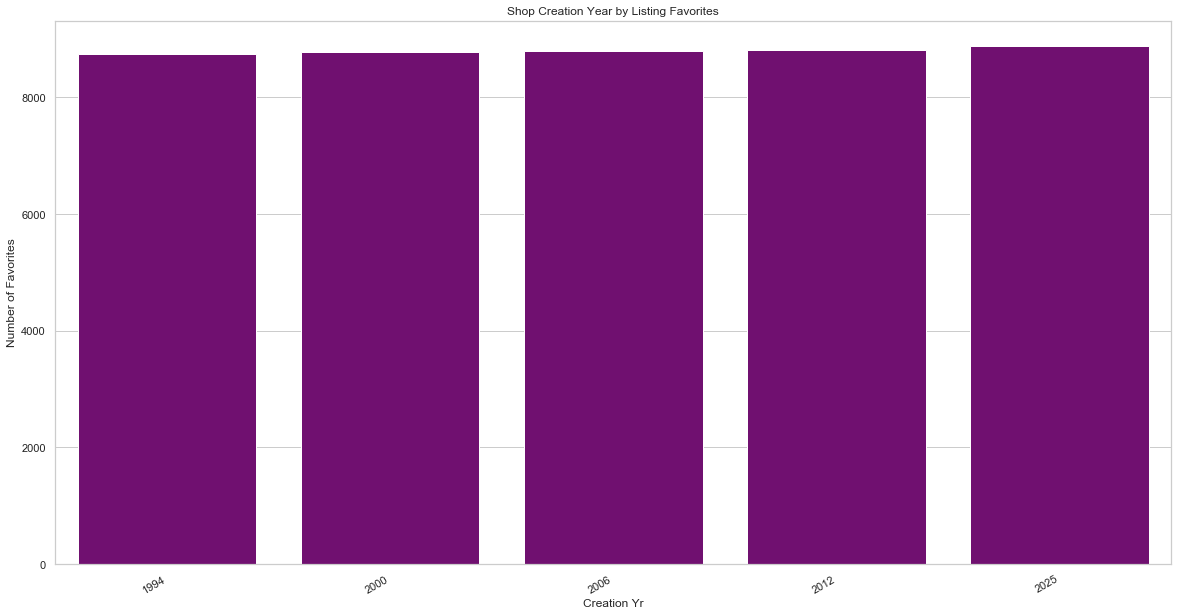

In [56]:
# Set up the matplotlib figure.
f, c2x = plt.subplots(figsize=(20, 10))
c2x = sns.barplot(x=yrs, y=pred_favs3, color='purple', saturation=0.75)
c2x.set(title='Shop Creation Year by Listing Favorites', xlabel='Creation Yr', ylabel='Number of Favorites')
c2x.set_xticklabels(c2x.get_xticklabels(), rotation=30, ha='right')

# Display values


def show_values_on_bars(c2xs):
    def _show_on_single_plot(c2x):
        for p in c2x.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            c2x.text(_x, _y, value, ha="center")

    if isinstance(c2xs, np.ndarray):
        for idx, bx in np.ndenumerate(c2xs):
            _show_on_single_plot(c2x)
    else:
        _show_on_single_plot(c2xs)


# Show plot
show_values_on_bars(c2x)
plt.show()

In [48]:
# Select listing
pd.set_option('display.max_colwidth', -1)
listing = final_df.loc[1:1, :]
listing.description

1    ♥ Finished Bottle Cap ♥Finished Bottle Caps for Hair Bow Centers, Scrapbooks, Jewelry, Magnets Etc.Made with Quality Materials:♥ 1 Silver Flat Bottle Cap ♥ Colorful Image Printed on Glossy Photo Paper♥ 3-D Effect Epoxy Dome for Super Clear Picture All products are made to order & may require 2-3 business days to process.{ 3-5 business days for Custom Orders & during busy Christmas holiday season } Orders ship via USPS First Class Mail.COPYRIGHT NOTICE:All copyrights and trademarks of the character images used belong to their respective owners and are not being sold. You are only paying for the time, effort & materials used to create and customize your item(s). www.BottleCaps4Kids.comwww.DisneyBottleCaps.comhttp://stores.ebay.com/Disney-On-Parade ♥ Bottle Cap Christmas Ornament ♥Made with Quality Materials:♥ (3) 1 Silver Flat Bottle Caps ♥ Colorful Images Printed on Glossy Photo Paper♥ 3-D Effect Epoxy Domes for Super Clear Pictures All products are made to order & may require 3-5 

In [52]:
# Set different msg to try
desc_try = [
    ' ♥ Finished Bottle Cap ♥Finished Bottle Caps for Hair Bow Centers, BUTTON, Watch BAND, Scrapbooks, Jewelry, Magnets Etc.Made with Quality Materials:♥ 1 Silver Flat Bottle Cap inspired by EPCOT ♥ CHECK the Colorful IMAGE Printed on Glossy Photo Paper♥ 3-D Effect Epoxy Dome for Super Clear Picture All LISTINGS are made to order & may require 2-3 business days to process.{ 3-5 business days for Custom Orders & during busy Christmas holiday season } Orders ship via USPS First Class Mail.COPYRIGHT NOTICE:All copyrights and trademarks of the character images used belong to their respective owners and are not being sold. You are only paying for the time, effort & materials used to create and customize and FIT your item(s). www.BottleCaps4Kids.comwww.DisneyBottleCaps.comhttp://stores.ebay.com/Disney-On-Parade']

# TFIDF Vectorizer applied to all shops' descriptions
# Applying the vectorizer
dsc_data_counts_desc_try= counter.fit_transform(desc_try)
feature_dsc_try = counter.get_feature_names()

# Create tiles for listing info and predict favorites
# Listing = np.tile(listing, (len(message_try), 1))
# Listing[:, 8] = message_try
# predicted_favs = ridgeregr.predict(Listing)

ValueError: max_df corresponds to < documents than min_df